In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco

plt.style.use('fivethirtyeight')
np.random.seed(777)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
pwd

'F:\\OneDrive - IIT Kanpur\\Desktop\\modelling'

In [3]:
dataset = pd.read_csv("F:\\OneDrive - IIT Kanpur\\Desktop\\modelling\\closing_price_with_weekends.csv")
dataset.head(10)

,Day,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,BPCL,...,SUNPHARMA,TATACONSUM,TATAMOTORS,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UPL,WIPRO
0,01-01-2019,389.000000,1266.400024,1371.550049,627.299988,2726.649902,652.195007,2656.850098,293.358002,367.200012,...,433.549988,219.100006,173.449997,51.575001,1902.800049,719.099976,928.000000,4009.199951,502.333344,244.987564
1,02-01-2019,381.299988,1258.750000,1383.300049,620.049988,2692.000000,638.400024,2614.050049,287.068481,357.950012,...,440.049988,214.600006,168.550003,49.365002,1923.300049,712.049988,932.150024,4006.100098,504.333344,244.162567
2,03-01-2019,378.100006,1266.650024,1388.300049,607.950012,2701.350098,638.330017,2586.199951,287.848907,352.500000,...,436.100006,210.050003,166.050003,48.125000,1899.949951,691.250000,931.200012,3900.050049,497.766663,244.125061
3,04-01-2019,382.149994,1293.000000,1385.849976,619.599976,2734.199951,641.044983,2576.050049,296.066620,359.450012,...,433.799988,213.800003,170.949997,48.764999,1876.849976,681.099976,928.450012,3914.550049,504.266663,243.337555
4,05-01-2019,378.247780,1297.632013,1392.339764,613.287909,2730.644800,636.370182,2545.053246,295.240012,354.207045,...,433.836513,210.325796,168.525760,47.414057,1869.377570,667.358971,929.113581,3857.746984,502.652880,242.971825
5,06-01-2019,376.821206,1309.119343,1395.997582,611.345622,2739.099089,634.271637,2520.637490,297.285429,352.670379,...,432.881928,208.981041,168.331261,46.678400,1856.028694,654.949848,928.622918,3849.715383,505.829279,242.300174
6,07-01-2019,381.649994,1282.099976,1396.000000,637.450012,2658.550049,640.715027,2553.600098,298.362061,355.549988,...,430.799988,214.949997,175.350006,48.549999,1897.900024,687.500000,944.049988,3926.750000,509.166656,243.187561
7,08-01-2019,378.750000,1249.500000,1401.250000,650.900024,2694.850098,644.304993,2537.050049,302.310242,351.950012,...,448.049988,215.149994,179.949997,49.134998,1893.550049,689.849976,946.150024,3916.300049,501.466675,244.162567
8,09-01-2019,377.299988,1267.400024,1402.000000,670.099976,2696.899902,639.909973,2524.350098,307.130676,340.049988,...,448.750000,212.600006,183.050003,47.919998,1886.949951,693.700012,952.950012,3817.250000,509.866669,246.750061
9,10-01-2019,380.250000,1285.400024,1396.349976,663.250000,2725.300049,637.195007,2514.649902,309.701569,335.600006,...,444.600006,214.149994,185.750000,48.040001,1888.550049,694.549988,966.700012,3818.199951,515.400024,244.312561


In [4]:
df = dataset.set_index('Day')
df.head()

,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,BPCL,BRITANNIA,...,SUNPHARMA,TATACONSUM,TATAMOTORS,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UPL,WIPRO
Day,,,,,,,,,,,,,,,,,,,,,
01-01-2019,389.000000,1266.400024,1371.550049,627.299988,2726.649902,652.195007,2656.850098,293.358002,367.200012,3103.050049,...,433.549988,219.100006,173.449997,51.575001,1902.800049,719.099976,928.000000,4009.199951,502.333344,244.987564
02-01-2019,381.299988,1258.750000,1383.300049,620.049988,2692.000000,638.400024,2614.050049,287.068481,357.950012,3116.850098,...,440.049988,214.600006,168.550003,49.365002,1923.300049,712.049988,932.150024,4006.100098,504.333344,244.162567
03-01-2019,378.100006,1266.650024,1388.300049,607.950012,2701.350098,638.330017,2586.199951,287.848907,352.500000,3135.899902,...,436.100006,210.050003,166.050003,48.125000,1899.949951,691.250000,931.200012,3900.050049,497.766663,244.125061
04-01-2019,382.149994,1293.000000,1385.849976,619.599976,2734.199951,641.044983,2576.050049,296.066620,359.450012,3122.699951,...,433.799988,213.800003,170.949997,48.764999,1876.849976,681.099976,928.450012,3914.550049,504.266663,243.337555
05-01-2019,378.247780,1297.632013,1392.339764,613.287909,2730.644800,636.370182,2545.053246,295.240012,354.207045,3135.742876,...,433.836513,210.325796,168.525760,47.414057,1869.377570,667.358971,929.113581,3857.746984,502.652880,242.971825


In [5]:
ret = np.log(1+df.pct_change())
ret

,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,BPCL,BRITANNIA,...,SUNPHARMA,TATACONSUM,TATAMOTORS,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UPL,WIPRO
Day,,,,,,,,,,,,,,,,,,,,,
01-01-2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02-01-2019,-0.019993,-0.006059,0.008530,-0.011625,-0.012789,-0.021379,-0.016240,-0.021673,-0.025513,0.004437,...,0.014881,-0.020752,-0.028657,-0.043795,0.010716,-0.009852,0.004462,-0.000773,0.003974,-0.003373
03-01-2019,-0.008428,0.006256,0.003608,-0.019707,0.003467,-0.000110,-0.010711,0.002715,-0.015343,0.006093,...,-0.009017,-0.021430,-0.014943,-0.025440,-0.012215,-0.029647,-0.001020,-0.026829,-0.013106,-0.000154
04-01-2019,0.010654,0.020589,-0.001766,0.018981,0.012087,0.004244,-0.003932,0.028149,0.019524,-0.004218,...,-0.005288,0.017695,0.029082,0.013211,-0.012233,-0.014792,-0.002958,0.003711,0.012974,-0.003231
05-01-2019,-0.010264,0.003576,0.004672,-0.010240,-0.001301,-0.007319,-0.012106,-0.002796,-0.014694,0.004168,...,0.000084,-0.016383,-0.014282,-0.028094,-0.003989,-0.020381,0.000714,-0.014617,-0.003205,-0.001504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26-08-2022,0.026246,0.011081,-0.011651,0.002083,-0.002107,0.002441,0.002119,-0.013792,-0.002125,0.000973,...,0.003243,0.000125,0.012659,0.010300,0.001242,0.013868,0.026585,0.006481,-0.003481,0.004925
27-08-2022,-0.000176,0.000765,0.000508,0.000023,0.000236,0.000375,0.000527,0.000457,-0.000036,0.001181,...,0.000492,0.000686,0.000621,0.000735,0.000480,-0.001121,0.000477,0.000453,0.000611,0.000758
28-08-2022,0.000498,0.000764,0.000508,0.000132,0.000236,0.000496,0.000527,0.000577,-0.000037,0.000177,...,0.000492,0.000685,0.000621,0.000735,0.000479,0.000569,0.000477,0.000452,0.000271,0.000757


In [6]:
returns = ret.drop('01-01-2019',axis=0,inplace = False)
print(list(returns))
returns

['ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DIVISLAB', 'DRREDDY', 'EICHERMOT', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK', 'HDFCLIFE', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFY', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBILIFE', 'SBIN', 'SHREECEMEN', 'SUNPHARMA', 'TATACONSUM', 'TATAMOTORS', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO', 'UPL', 'WIPRO']


,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,BPCL,BRITANNIA,...,SUNPHARMA,TATACONSUM,TATAMOTORS,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UPL,WIPRO
Day,,,,,,,,,,,,,,,,,,,,,
02-01-2019,-0.019993,-0.006059,0.008530,-0.011625,-0.012789,-0.021379,-0.016240,-0.021673,-0.025513,0.004437,...,0.014881,-0.020752,-0.028657,-0.043795,0.010716,-0.009852,0.004462,-0.000773,0.003974,-0.003373
03-01-2019,-0.008428,0.006256,0.003608,-0.019707,0.003467,-0.000110,-0.010711,0.002715,-0.015343,0.006093,...,-0.009017,-0.021430,-0.014943,-0.025440,-0.012215,-0.029647,-0.001020,-0.026829,-0.013106,-0.000154
04-01-2019,0.010654,0.020589,-0.001766,0.018981,0.012087,0.004244,-0.003932,0.028149,0.019524,-0.004218,...,-0.005288,0.017695,0.029082,0.013211,-0.012233,-0.014792,-0.002958,0.003711,0.012974,-0.003231
05-01-2019,-0.010264,0.003576,0.004672,-0.010240,-0.001301,-0.007319,-0.012106,-0.002796,-0.014694,0.004168,...,0.000084,-0.016383,-0.014282,-0.028094,-0.003989,-0.020381,0.000714,-0.014617,-0.003205,-0.001504
06-01-2019,-0.003779,0.008814,0.002624,-0.003172,0.003091,-0.003303,-0.009640,0.006904,-0.004348,0.001738,...,-0.002203,-0.006414,-0.001155,-0.015637,-0.007166,-0.018769,-0.000528,-0.002084,0.006299,-0.002768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26-08-2022,0.026246,0.011081,-0.011651,0.002083,-0.002107,0.002441,0.002119,-0.013792,-0.002125,0.000973,...,0.003243,0.000125,0.012659,0.010300,0.001242,0.013868,0.026585,0.006481,-0.003481,0.004925
27-08-2022,-0.000176,0.000765,0.000508,0.000023,0.000236,0.000375,0.000527,0.000457,-0.000036,0.001181,...,0.000492,0.000686,0.000621,0.000735,0.000480,-0.001121,0.000477,0.000453,0.000611,0.000758
28-08-2022,0.000498,0.000764,0.000508,0.000132,0.000236,0.000496,0.000527,0.000577,-0.000037,0.000177,...,0.000492,0.000685,0.000621,0.000735,0.000479,0.000569,0.000477,0.000452,0.000271,0.000757


In [7]:
returns.mean()

ADANIPORTS    0.000600
APOLLOHOSP    0.000954
ASIANPAINT    0.000703
AXISBANK      0.000140
BAJAJ-AUTO    0.000314
BAJAJFINSV    0.000743
BAJFINANCE    0.000786
BHARTIARTL    0.000705
BPCL         -0.000086
BRITANNIA     0.000147
CIPLA         0.000533
COALINDIA    -0.000022
DIVISLAB      0.000699
DRREDDY       0.000379
EICHERMOT     0.000288
GRASIM        0.000544
HCLTECH       0.000521
HDFC          0.000153
HDFCBANK      0.000252
HDFCLIFE      0.000309
HEROMOTOCO   -0.000076
HINDALCO      0.000527
HINDUNILVR    0.000303
ICICIBANK     0.000693
INDUSINDBK   -0.000284
INFY          0.000628
ITC           0.000098
JSWSTEEL      0.000611
KOTAKBANK     0.000331
LT            0.000224
M&M           0.000409
MARUTI        0.000151
NESTLEIND     0.000461
NTPC          0.000218
ONGC         -0.000054
POWERGRID     0.000331
RELIANCE      0.000672
SBILIFE       0.000619
SBIN          0.000445
SHREECEMEN    0.000204
SUNPHARMA     0.000561
TATACONSUM    0.001016
TATAMOTORS    0.000776
TATASTEEL  

In [8]:
returns.cov()

,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,BPCL,BRITANNIA,...,SUNPHARMA,TATACONSUM,TATAMOTORS,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UPL,WIPRO
ADANIPORTS,0.000572,0.000125,0.000130,0.000218,0.000124,0.000204,0.000260,0.000128,0.000188,0.000110,...,0.000105,0.000166,0.000254,0.000174,0.000083,0.000142,0.000207,0.000208,0.000222,0.000101
APOLLOHOSP,0.000125,0.000564,0.000101,0.000137,0.000079,0.000179,0.000210,0.000094,0.000110,0.000085,...,0.000093,0.000104,0.000165,0.000125,0.000078,0.000126,0.000128,0.000136,0.000135,0.000100
ASIANPAINT,0.000130,0.000101,0.000267,0.000147,0.000088,0.000135,0.000172,0.000068,0.000108,0.000110,...,0.000048,0.000101,0.000159,0.000105,0.000070,0.000107,0.000183,0.000136,0.000118,0.000084
AXISBANK,0.000218,0.000137,0.000147,0.000590,0.000151,0.000299,0.000375,0.000138,0.000207,0.000110,...,0.000098,0.000116,0.000316,0.000299,0.000095,0.000160,0.000293,0.000184,0.000227,0.000120
BAJAJ-AUTO,0.000124,0.000079,0.000088,0.000151,0.000270,0.000147,0.000191,0.000089,0.000106,0.000094,...,0.000079,0.000109,0.000186,0.000111,0.000064,0.000075,0.000155,0.000106,0.000142,0.000071
BAJAJFINSV,0.000204,0.000179,0.000135,0.000299,0.000147,0.000500,0.000509,0.000143,0.000217,0.000121,...,0.000104,0.000176,0.000262,0.000238,0.000100,0.000151,0.000245,0.000190,0.000187,0.000098
BAJFINANCE,0.000260,0.000210,0.000172,0.000375,0.000191,0.000509,0.000820,0.000175,0.000257,0.000186,...,0.000119,0.000232,0.000319,0.000265,0.000114,0.000177,0.000336,0.000229,0.000227,0.000109
BHARTIARTL,0.000128,0.000094,0.000068,0.000138,0.000089,0.000143,0.000175,0.000438,0.000109,0.000063,...,0.000110,0.000114,0.000139,0.000135,0.000073,0.000082,0.000070,0.000100,0.000089,0.000053
BPCL,0.000188,0.000110,0.000108,0.000207,0.000106,0.000217,0.000257,0.000109,0.000494,0.000109,...,0.000113,0.000138,0.000234,0.000216,0.000086,0.000123,0.000170,0.000168,0.000179,0.000100
BRITANNIA,0.000110,0.000085,0.000110,0.000110,0.000094,0.000121,0.000186,0.000063,0.000109,0.000353,...,0.000080,0.000149,0.000101,0.000080,0.000063,0.000082,0.000134,0.000107,0.000128,0.000070


In [9]:
covariance_matrix = returns.cov().to_numpy()
max_value = covariance_matrix.max()
min_value = covariance_matrix.min()
print('min_value :',np.sqrt(min_value))
print('max_value:',np.sqrt(max_value))

min_value : 0.0031010072956446865
max_value: 0.044081468886546946


In [11]:
n = 1000
num_ports = n*50
num_of_assets = 50
all_weights = np.zeros((num_ports, num_of_assets))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    if x%n == 0:
        print(x)
    # Weights
    weights = np.array(np.random.random(num_of_assets))
    weights = weights/np.sum(weights)
    # Save weights
    all_weights[x,:] = weights
    # Expected return
    ret_arr[x] = np.sum((returns.mean() * weights))
    #annualised_return => ret_arr[x] = np.sum((returns_1.mean() * weights*252))
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))
    #annualised_volatility => vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(returns_1.cov()*252, weights)))
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000


In [15]:
vol_arr.max()

0.013325767601566344

In [16]:
vol_arr.min()

0.010838056380929188

In [12]:
sharpe_arr.max()
p = sharpe_arr.argmax()
print(all_weights[p,:])

[0.00082131 0.04462399 0.03967343 0.00211264 0.0081591  0.00583204
 0.01738033 0.0351268  0.02217007 0.00644275 0.04071123 0.00402053
 0.04181497 0.0204946  0.01393935 0.002757   0.02961734 0.03044334
 0.01071246 0.0085651  0.00361264 0.01968954 0.02316356 0.00452441
 0.00290441 0.01851906 0.04504754 0.03069505 0.00186732 0.00458486
 0.03745046 0.0082787  0.0279471  0.03021411 0.02302327 0.02275623
 0.03217365 0.03180002 0.008191   0.02856066 0.0330437  0.0342046
 0.0003677  0.03436492 0.00756864 0.01506398 0.02198954 0.00570528
 0.01429588 0.04297383]


In [13]:
mr = ret_arr[p]
mv = vol_arr[p]

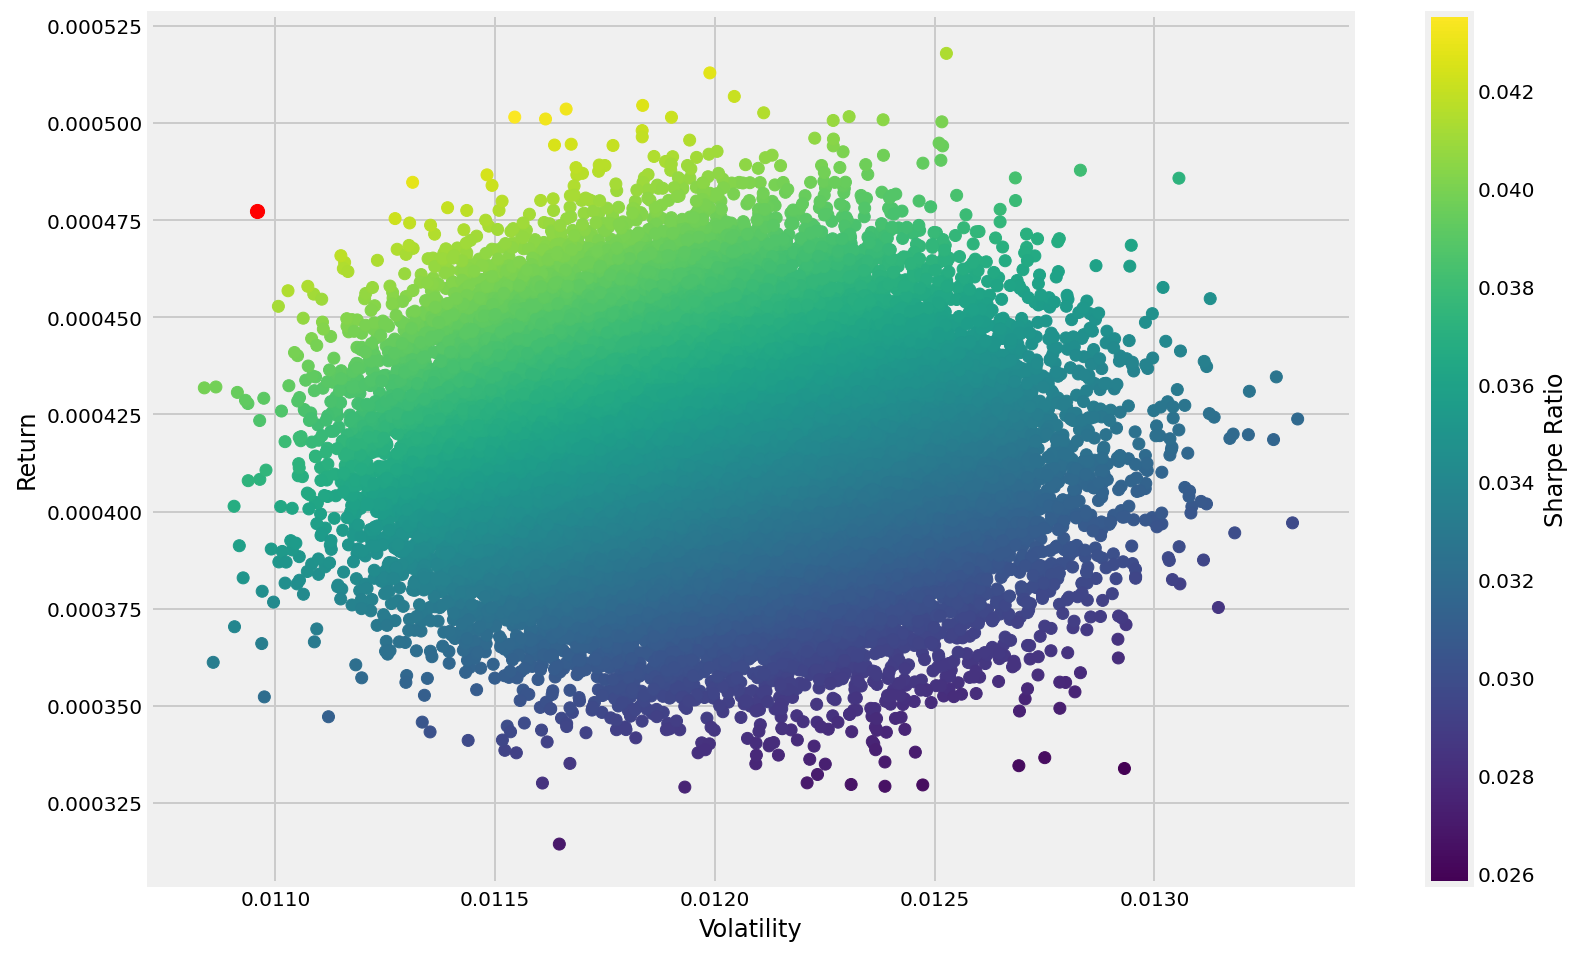

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(mv, mr,c='red', s=50) # red dot
plt.show()

In [17]:
#range of volatility => (0.0031,0.044)
#according to the graph => range of volatility => (0.0108, 0.0133)

In [41]:
min_value = 0.0105
max_value = 0.0140
step = 500
fx = np.linspace(min_value,max_value,step)

In [42]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(returns.mean()*weights)
    negative_ret = (-1)*ret
    vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))
    sr = ret/vol
    return np.array([negative_ret, vol, sr])

def neg_ret(weights):
    return get_ret_vol_sr(weights)[0]

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [43]:
a = 1/50   # initial guesses for weightages
c = ((0,1),)  # boundaries for each weight 
b = []       #array for initial guesses for each weight
d = ()       #array for boundaries for each weight
for i in range(50):
    b.append(a)
    d = d+c

In [44]:
b

[0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02]

In [45]:
d

((0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1))

In [46]:
from scipy.optimize import minimize
fy = []

for i in fx:
    print(i)
    offset = 0.0
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[1] - i})
    
    result = minimize(neg_ret, b, method='SLSQP', bounds=d, constraints=cons)
    fy.append(result['fun']+offset) 

0.0105
0.010507014028056113
0.010514028056112226
0.010521042084168337
0.01052805611222445
0.010535070140280562
0.010542084168336675
0.010549098196392786
0.010556112224448898
0.01056312625250501
0.010570140280561123
0.010577154308617234
0.010584168336673347
0.01059118236472946
0.010598196392785572
0.010605210420841685
0.010612224448897796
0.010619238476953908
0.010626252505010021
0.010633266533066133
0.010640280561122244
0.010647294589178357
0.01065430861723447
0.010661322645290582
0.010668336673346695
0.010675350701402806
0.010682364729458918
0.010689378757515031
0.010696392785571144
0.010703406813627254
0.010710420841683367
0.01071743486973948
0.010724448897795592
0.010731462925851703
0.010738476953907816
0.010745490981963928
0.010752505010020041
0.010759519038076154
0.010766533066132265
0.010773547094188377
0.01078056112224449
0.010787575150300602
0.010794589178356713
0.010801603206412826
0.010808617234468939
0.010815631262525051
0.010822645290581162
0.010829659318637275
0.0108366733

0.01327054108216433
0.01327755511022044
0.013284569138276553
0.013291583166332666
0.013298597194388778
0.01330561122244489
0.013312625250501002
0.013319639278557114
0.013326653306613227
0.01333366733466934
0.01334068136272545
0.013347695390781563
0.013354709418837676
0.013361723446893788
0.013368737474949901
0.013375751503006012
0.013382765531062124
0.013389779559118237
0.013396793587174348
0.01340380761523046
0.013410821643286573
0.013417835671342686
0.013424849699398798
0.013431863727454911
0.013438877755511022
0.013445891783567135
0.013452905811623247
0.013459919839679358
0.01346693386773547
0.013473947895791583
0.013480961923847696
0.013487975951903809
0.013494989979959921
0.013502004008016032
0.013509018036072145
0.013516032064128257
0.013523046092184368
0.01353006012024048
0.013537074148296593
0.013544088176352706
0.013551102204408819
0.01355811623246493
0.013565130260521042
0.013572144288577155
0.013579158316633267
0.013586172344689378
0.013593186372745491
0.013600200400801604
0

In [53]:
fy_positive = []
for i in range(step):
    fy_positive.append(-1*fy[i])

In [55]:
len(fy_positive)

500

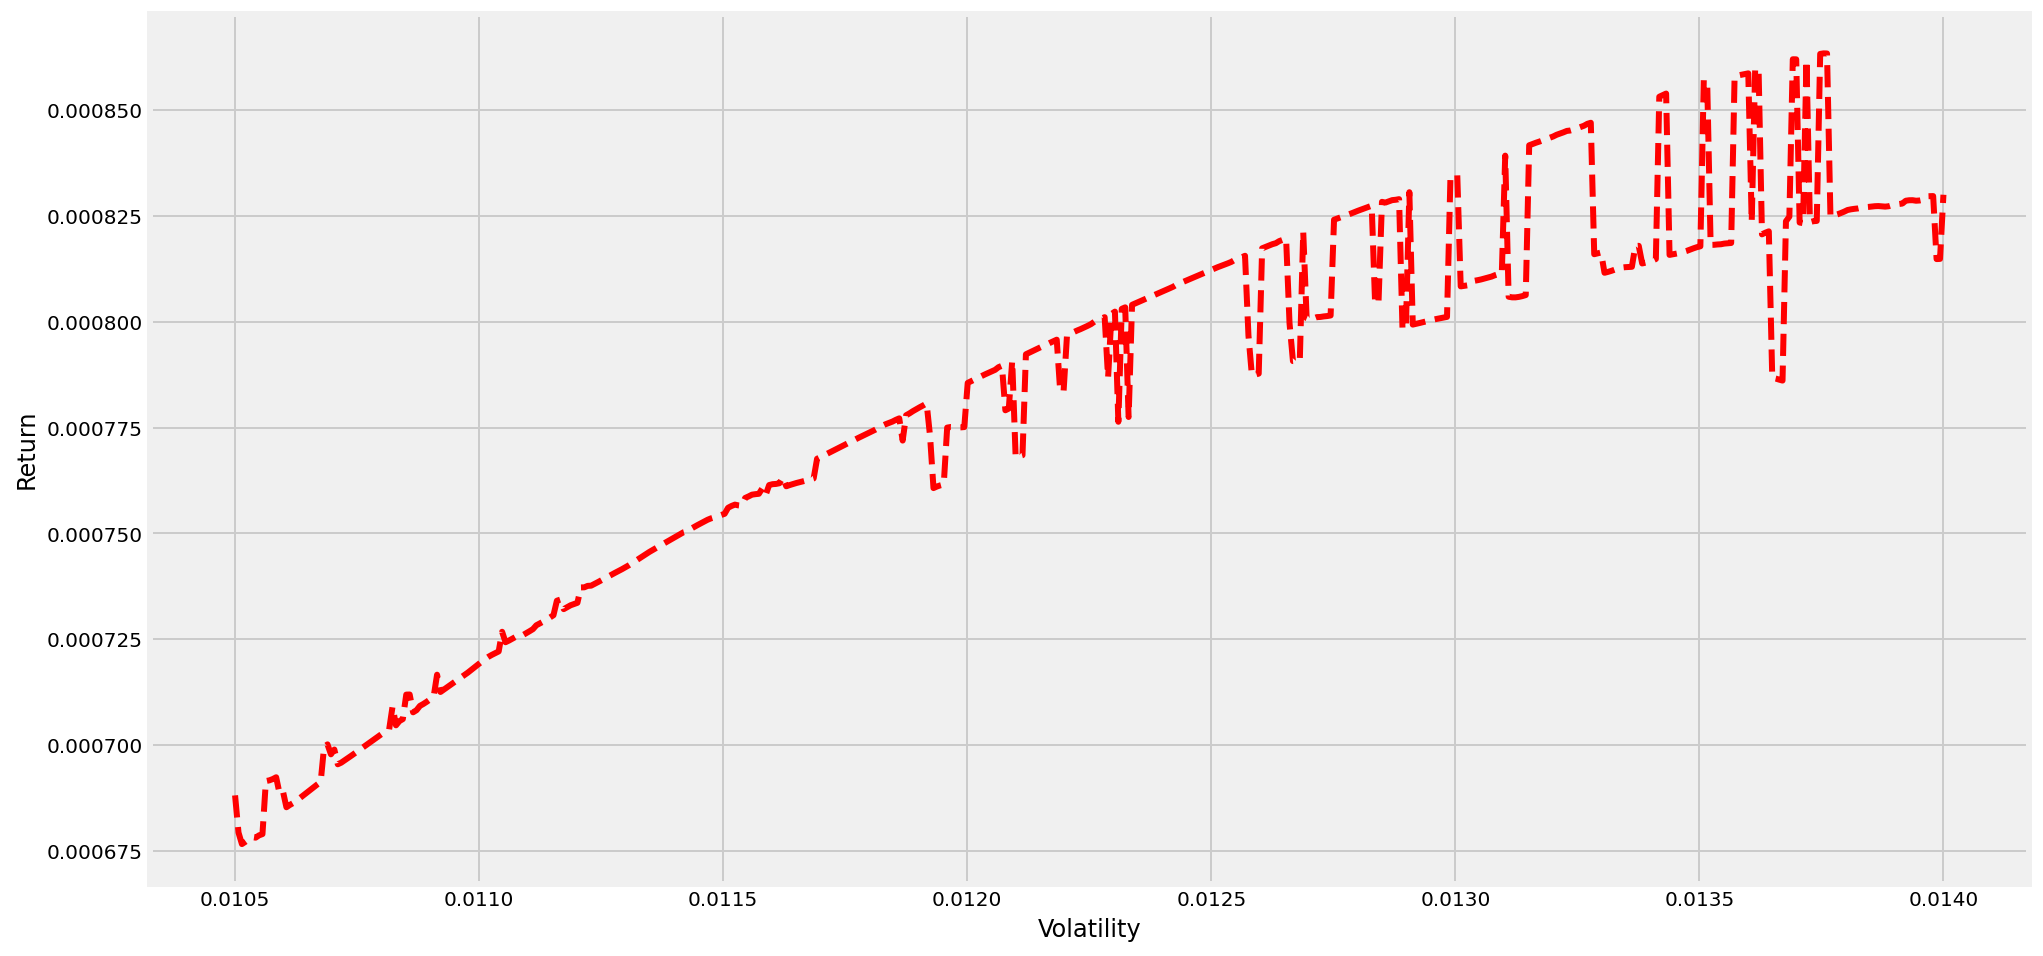

In [56]:
plt.figure(figsize=(15,8))
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(fx,fy_positive, 'r--', linewidth=3)
#plt.savefig('cover.png')
plt.show()

In [60]:
from scipy.optimize import minimize
fy_cobyla = []

for i in fx:
    print(i)
    offset = 0.0
    cons = ({'type':'eq', 'fun':lambda w:np.sum(w)-1},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[1] - i})
    
    result = minimize(neg_ret, b, method='trust-constr', bounds=d, constraints=cons)
    fy_cobyla.append(result['fun']+offset) 

0.0105


C:\Program Files\python\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


0.010507014028056113
0.010514028056112226
0.010521042084168337
0.01052805611222445
0.010535070140280562
0.010542084168336675
0.010549098196392786
0.010556112224448898
0.01056312625250501
0.010570140280561123
0.010577154308617234
0.010584168336673347
0.01059118236472946
0.010598196392785572
0.010605210420841685
0.010612224448897796
0.010619238476953908
0.010626252505010021
0.010633266533066133
0.010640280561122244
0.010647294589178357
0.01065430861723447
0.010661322645290582
0.010668336673346695
0.010675350701402806
0.010682364729458918
0.010689378757515031
0.010696392785571144
0.010703406813627254
0.010710420841683367
0.01071743486973948
0.010724448897795592
0.010731462925851703
0.010738476953907816
0.010745490981963928
0.010752505010020041
0.010759519038076154
0.010766533066132265
0.010773547094188377
0.01078056112224449
0.010787575150300602
0.010794589178356713
0.010801603206412826
0.010808617234468939
0.010815631262525051
0.010822645290581162
0.010829659318637275
0.01083667334669338

0.01327054108216433
0.01327755511022044
0.013284569138276553
0.013291583166332666
0.013298597194388778
0.01330561122244489
0.013312625250501002
0.013319639278557114
0.013326653306613227
0.01333366733466934
0.01334068136272545
0.013347695390781563
0.013354709418837676
0.013361723446893788
0.013368737474949901
0.013375751503006012
0.013382765531062124
0.013389779559118237
0.013396793587174348
0.01340380761523046
0.013410821643286573
0.013417835671342686
0.013424849699398798
0.013431863727454911
0.013438877755511022
0.013445891783567135
0.013452905811623247
0.013459919839679358
0.01346693386773547
0.013473947895791583
0.013480961923847696
0.013487975951903809
0.013494989979959921
0.013502004008016032
0.013509018036072145
0.013516032064128257
0.013523046092184368
0.01353006012024048
0.013537074148296593
0.013544088176352706
0.013551102204408819
0.01355811623246493
0.013565130260521042
0.013572144288577155
0.013579158316633267
0.013586172344689378
0.013593186372745491
0.013600200400801604
0

In [61]:
fy_positive_co = []
for i in range(step):
    fy_positive_co.append(-1*fy[i])

In [62]:
len(fy_positive_co)

500

In [63]:
len(fx)

500

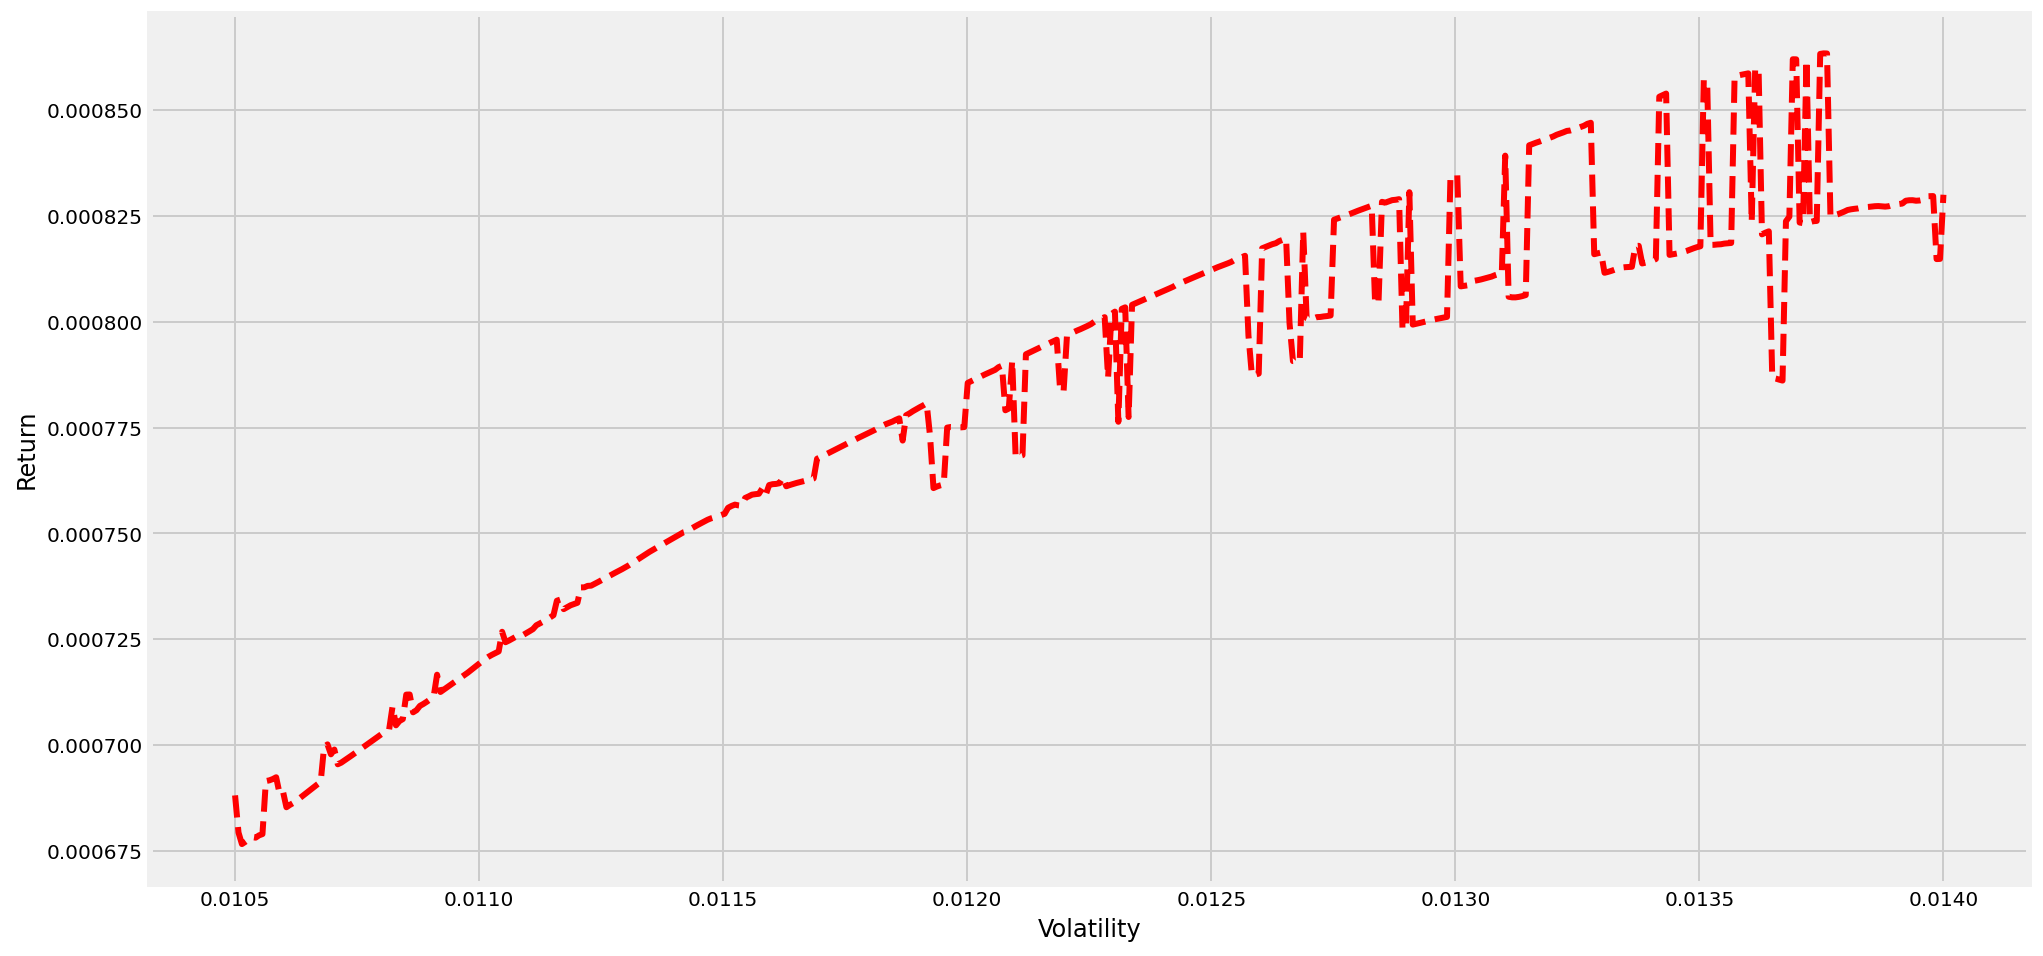

In [64]:
plt.figure(figsize=(15,8))
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(fx,fy_positive_co, 'r--', linewidth=3)
#plt.savefig('cover.png')
plt.show()

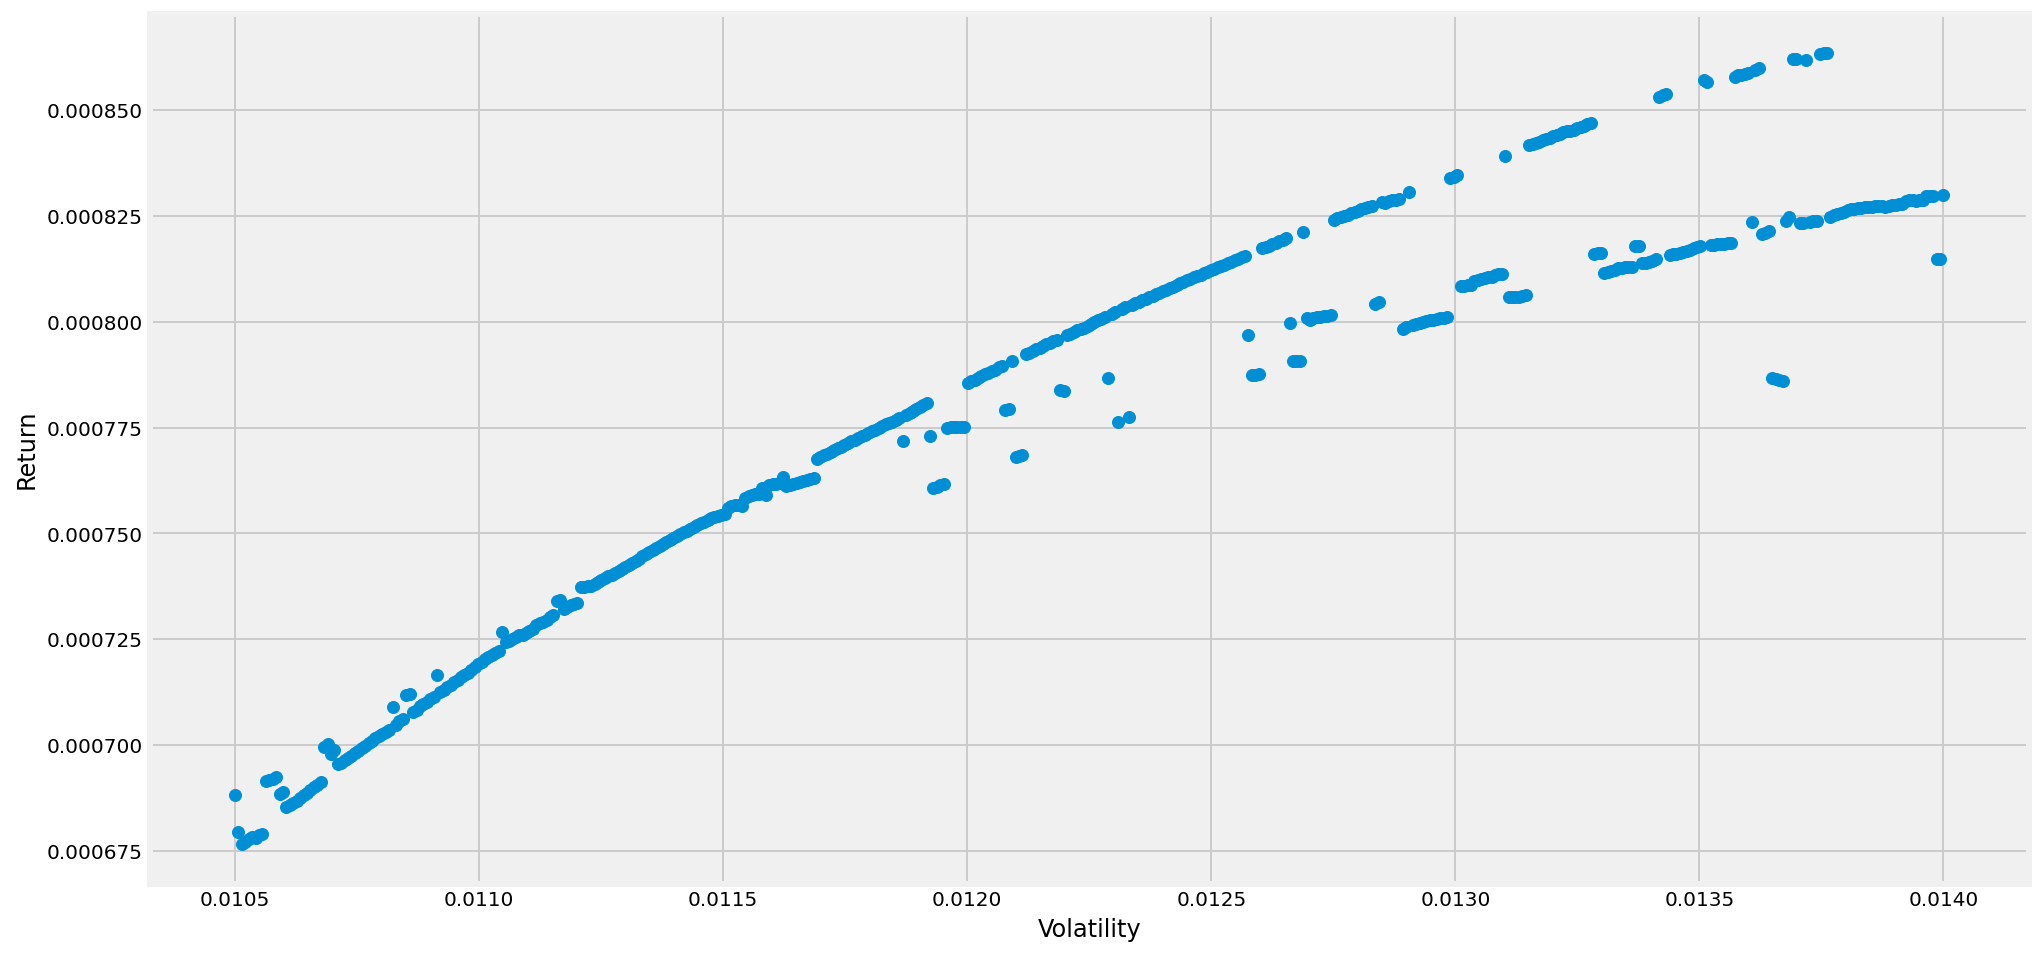

In [65]:
plt.figure(figsize=(15,8))
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(fx,fy_positive,marker = 'o')
#plt.savefig('cover.png')
plt.show()

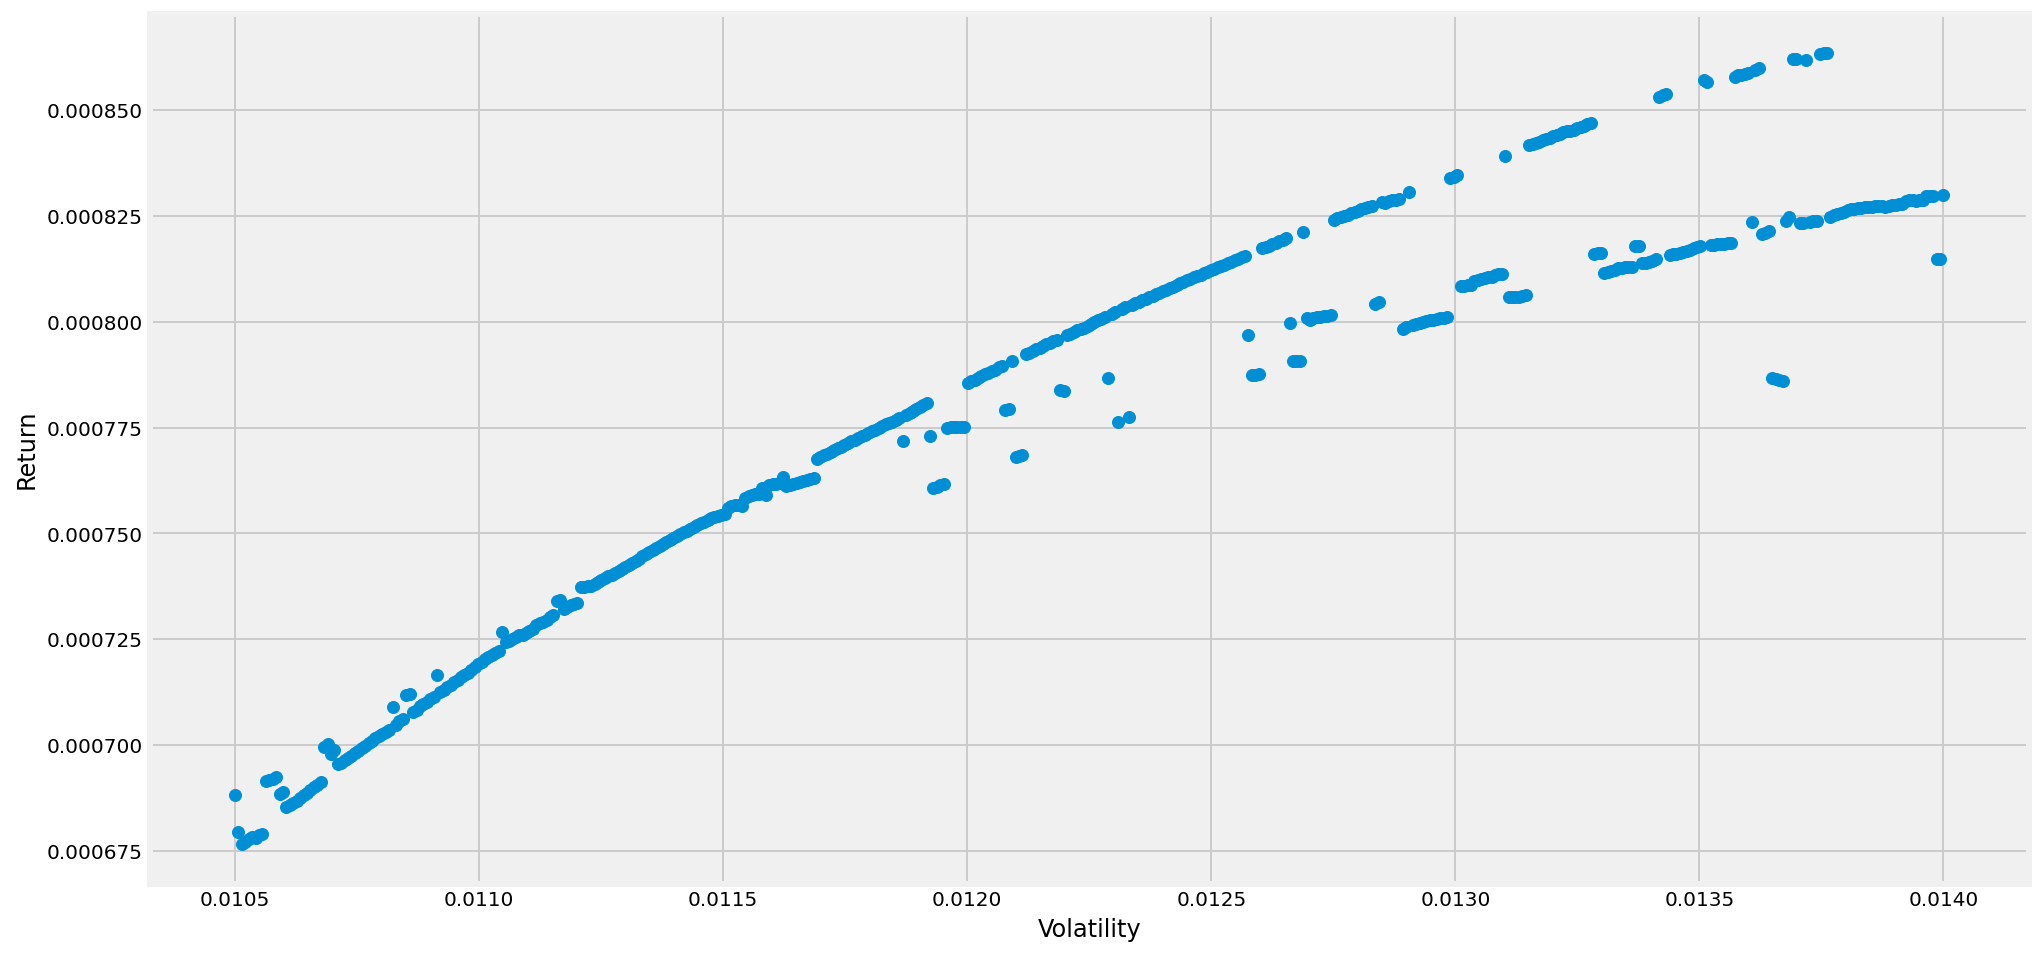

In [68]:
plt.figure(figsize=(15,8))
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(fx,fy_positive_co,marker='o')
#plt.savefig('cover.png')
plt.show()

In [69]:
fx_graph = []
fy_graph = []
for i in range(500):
    if fx[i]<=0.0130:
        fx_graph.append(fx[i])
        fy_graph.append(fy_positive[i])

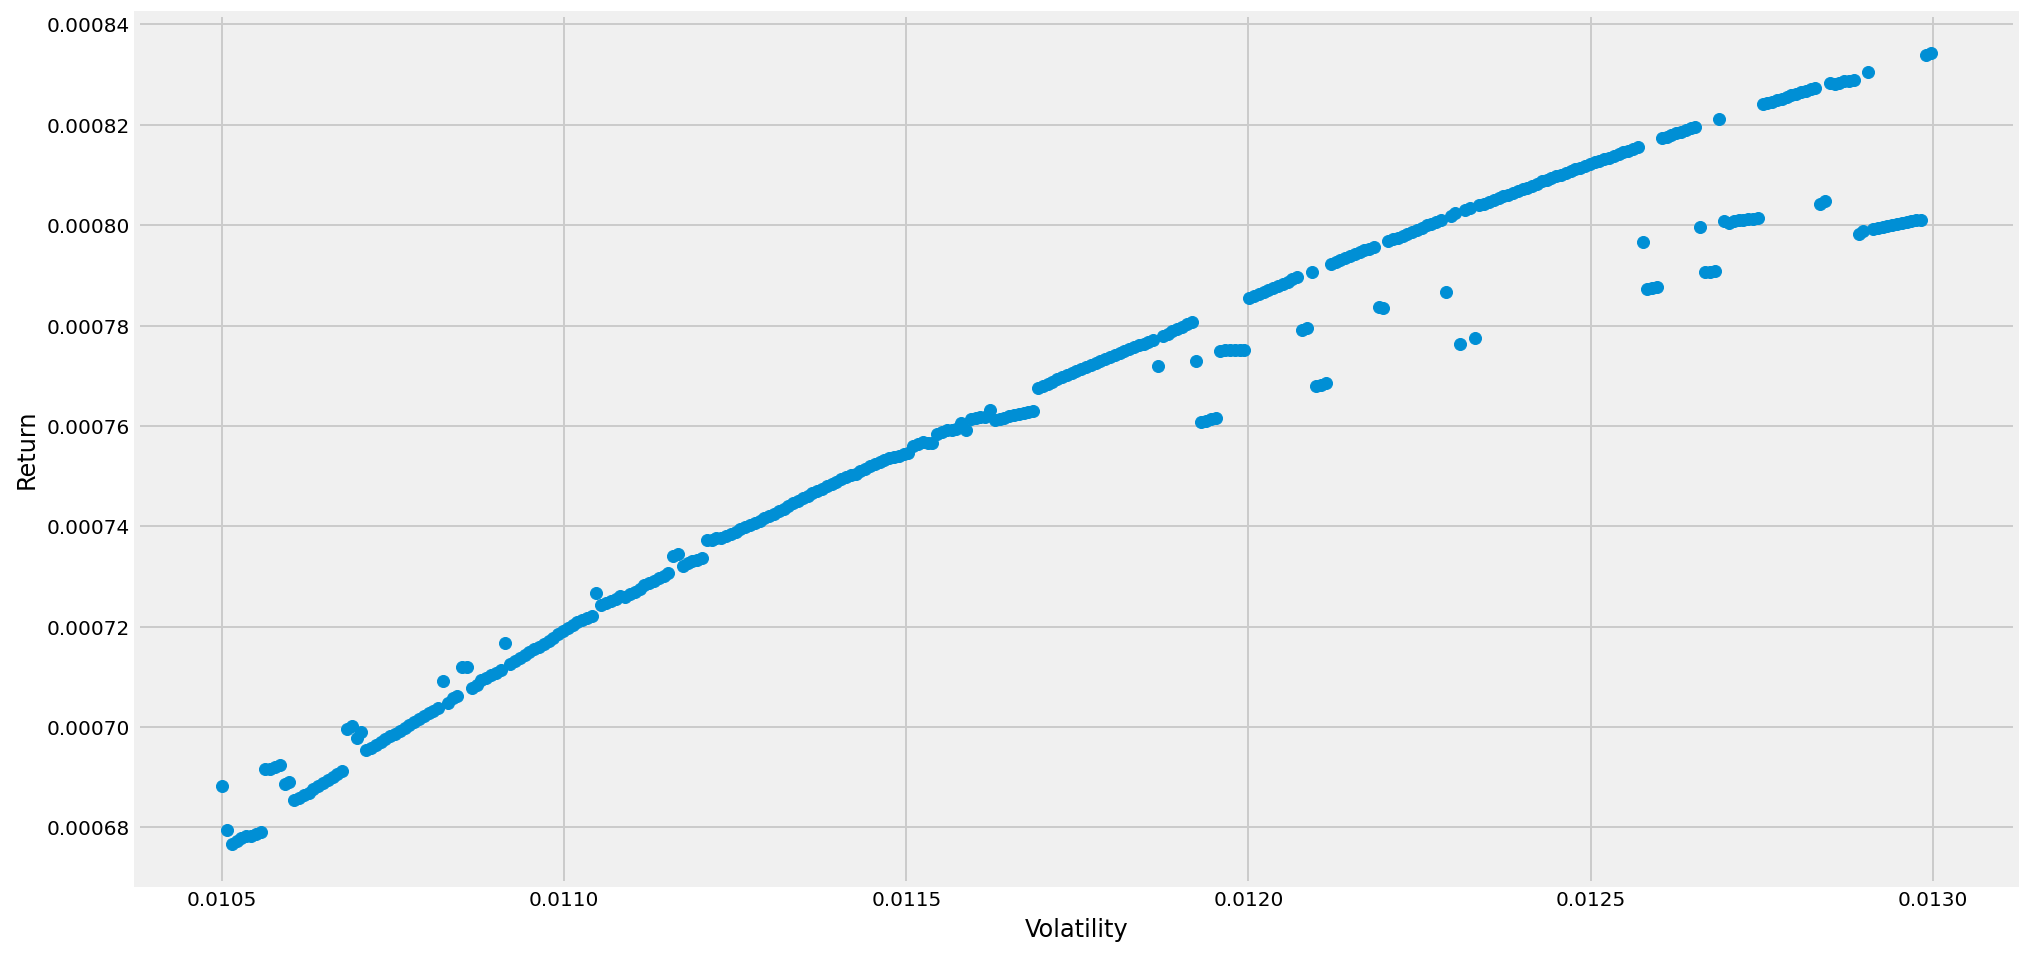

In [71]:
plt.figure(figsize=(15,8))
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(fx_graph,fy_graph, marker = 'o')
#plt.savefig('cover.png')
plt.show()

In [74]:
from scipy.optimize import maximise
fy_new = []

for i in fx:
    print(i)
    offset = 0.0
    cons = ({'type':'eq', 'fun':lambda w:np.sum(w)-1},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[1] - i})
    
    result = maximise(neg_ret, b, method='SLSQP', bounds=d, constraints=cons)
    fy_new.append(result['fun']+offset) 

ImportError: cannot import name 'maximise' from 'scipy.optimize' (C:\Program Files\python\lib\site-packages\scipy\optimize\__init__.py)